# 02wk-2: 학습률, 파이토치의 Step1-4

최규빈  
2025-03-17

# 3. 파라메터의 학습과정 음미

## A. 단순무식한 print

In [99]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
print(f"시작값 = {What.data.reshape(-1)}")
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    print(f'loss = {loss:.2f} \t 업데이트폭 = {-0.001 * What.grad.reshape(-1)} \t 업데이트결과: {What.data.reshape(-1)}')
    What.grad = None

시작값 = tensor([-5., 10.])
loss = 8587.62   업데이트폭 = tensor([ 1.3422, -1.1889])      업데이트결과: tensor([-3.6578,  8.8111])
loss = 5675.18   업데이트폭 = tensor([ 1.1029, -0.9499])      업데이트결과: tensor([-2.5548,  7.8612])
loss = 3755.63   업데이트폭 = tensor([ 0.9056, -0.7596])      업데이트결과: tensor([-1.6492,  7.1016])
loss = 2489.58   업데이트폭 = tensor([ 0.7431, -0.6081])      업데이트결과: tensor([-0.9061,  6.4935])
loss = 1654.04   업데이트폭 = tensor([ 0.6094, -0.4872])      업데이트결과: tensor([-0.2967,  6.0063])
loss = 1102.33   업데이트폭 = tensor([ 0.4995, -0.3907])      업데이트결과: tensor([0.2028, 5.6156])
loss = 737.85    업데이트폭 = tensor([ 0.4091, -0.3136])      업데이트결과: tensor([0.6119, 5.3020])
loss = 496.97    업데이트폭 = tensor([ 0.3350, -0.2519])      업데이트결과: tensor([0.9469, 5.0501])
loss = 337.72    업데이트폭 = tensor([ 0.2742, -0.2025])      업데이트결과: tensor([1.2211, 4.8477])
loss = 232.40    업데이트폭 = tensor([ 0.2243, -0.1629])      업데이트결과: tensor([1.4453, 4.6848])
loss = 162.73    업데이트폭 = tensor([ 0.1834, -0.1311])      업데이트결과: 

## B. 반복시각화 – yhat의 관점에서!

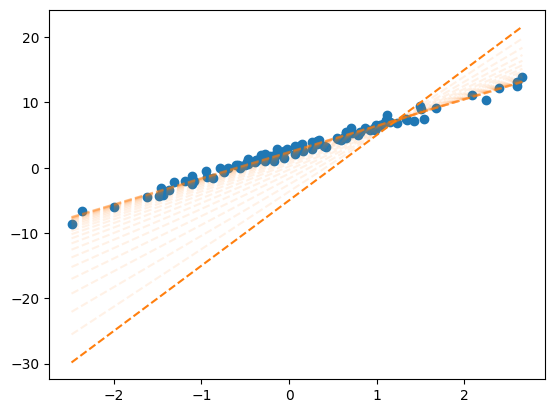

In [100]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
fig = plt.plot(x,y,'o',label = "observed")
plt.plot(x,X@What.data,'--',color="C1")
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    plt.plot(x,X@What.data,'--',color="C1",alpha=0.1)
    What.grad = None

## C. 반복시각화 – loss의 관점에서!!

In [101]:
def plot_loss():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    w0 = np.arange(-6, 11, 0.5) 
    w1 = np.arange(-6, 11, 0.5)
    W1,W0 = np.meshgrid(w1,w0)
    LOSS=W0*0
    for i in range(len(w0)):
        for j in range(len(w1)):
            LOSS[i,j]=torch.sum((y-w0[i]-w1[j]*x)**2)
    ax.plot_surface(W0, W1, LOSS, rstride=1, cstride=1, color='b',alpha=0.1)
    ax.azim = 30  ## 3d plot의 view 조절 
    ax.dist = 8   ## 3d plot의 view 조절 
    ax.elev = 5   ## 3d plot의 view 조절 
    ax.set_xlabel(r'$w_0$')  # x축 레이블 설정
    ax.set_ylabel(r'$w_1$')  # y축 레이블 설정
    ax.set_xticks([-5,0,5,10])  # x축 틱 간격 설정
    ax.set_yticks([-5,0,5,10])  # y축 틱 간격 설정
    return fig

In [102]:
l(-5,10)

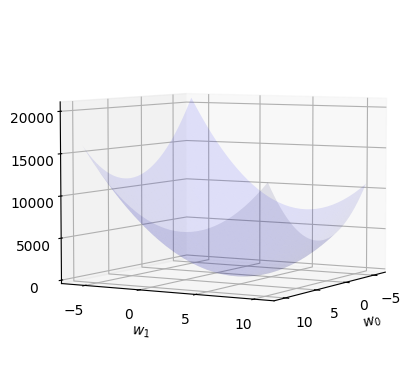

In [103]:
fig = plot_loss()

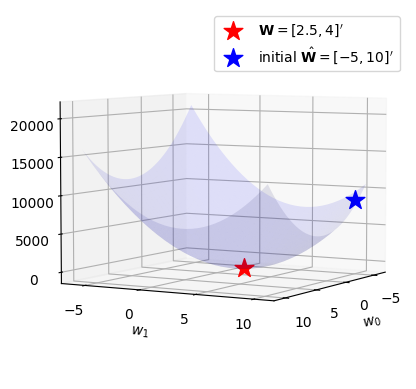

In [104]:
fig = plot_loss()
ax = fig.gca()
ax.scatter(2.5, 4, l(2.5,4), s=200, marker='*', color='red', label=r"${\bf W}=[2.5, 4]'$")
ax.scatter(-5, 10, l(-5,10), s=200, marker='*', color='blue', label=r"initial $\hat{\bf W}=[-5, 10]'$")
ax.legend()

In [105]:
w0,w1 = What.data.reshape(-1)

In [106]:
What.data

In [107]:
w0,w1

In [108]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    w0,w1 = What.data.reshape(-1) 
    ax.scatter(w0,w1,l(w0,w1),s=5,marker='o',color='blue')
    What.grad = None

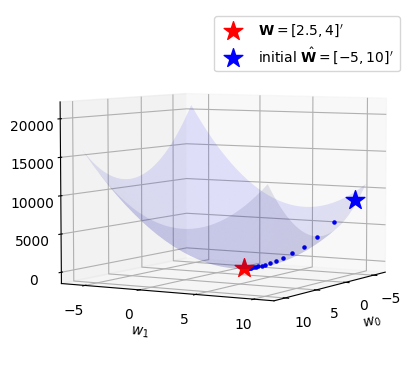

In [109]:
fig

## D. 애니메이션

In [110]:
from matplotlib import animation

In [111]:
plt.rcParams['figure.figsize'] = (7.5,2.5)
plt.rcParams["animation.html"] = "jshtml" 

In [112]:
def show_animation(alpha=0.001):
    ## 1. 히스토리 기록을 위한 list 초기화
    loss_history = [] 
    yhat_history = [] 
    What_history = [] 

    ## 2. 학습 + 학습과정기록
    What= torch.tensor([[-5.0],[10.0]],requires_grad=True)
    What_history.append(What.data.tolist())
    for epoc in range(30): 
        yhat=X@What ; yhat_history.append(yhat.data.tolist())
        loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
        loss.backward() 
        What.data = What.data - alpha * What.grad; What_history.append(What.data.tolist())
        What.grad = None    

    ## 3. 시각화 
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    #### ax1: yhat의 관점에서.. 
    ax1.plot(x,y,'o',label=r"$(x_i,y_i)$")
    line, = ax1.plot(x,yhat_history[0],label=r"$(x_i,\hat{y}_i)$") 
    ax1.legend()
    #### ax2: loss의 관점에서.. 
    w0 = np.arange(-6, 11, 0.5) 
    w1 = np.arange(-6, 11, 0.5)
    W1,W0 = np.meshgrid(w1,w0)
    LOSS=W0*0
    for i in range(len(w0)):
        for j in range(len(w1)):
            LOSS[i,j]=torch.sum((y-w0[i]-w1[j]*x)**2)
    ax2.plot_surface(W0, W1, LOSS, rstride=1, cstride=1, color='b',alpha=0.1)
    ax2.azim = 30  ## 3d plot의 view 조절 
    ax2.dist = 8   ## 3d plot의 view 조절 
    ax2.elev = 5   ## 3d plot의 view 조절 
    ax2.set_xlabel(r'$w_0$')  # x축 레이블 설정
    ax2.set_ylabel(r'$w_1$')  # y축 레이블 설정
    ax2.set_xticks([-5,0,5,10])  # x축 틱 간격 설정
    ax2.set_yticks([-5,0,5,10])  # y축 틱 간격 설정
    ax2.scatter(2.5, 4, l(2.5,4), s=200, marker='*', color='red', label=r"${\bf W}=[2.5, 4]'$")
    ax2.scatter(-5, 10, l(-5,10), s=200, marker='*', color='blue')
    ax2.legend()
    def animate(epoc):
        line.set_ydata(yhat_history[epoc])
        ax2.scatter(np.array(What_history)[epoc,0],np.array(What_history)[epoc,1],loss_history[epoc],color='grey')
        fig.suptitle(f"alpha = {alpha} / epoch = {epoc}")
        return line

    ani = animation.FuncAnimation(fig, animate, frames=30)
    plt.close()
    return ani

> epoch = 0 부터 시작하여 시작점에서 출발하도록 애니메이션을
> 수정했습니당.

In [113]:
ani = show_animation(alpha=0.001)
ani

## E. 학습률에 따른 시각화

`-` $\alpha$가 너무 작다면 비효율적임

In [114]:
show_animation(alpha=0.0001)

`-` $\alpha$가 크다고 무조건 좋은건 또 아님

In [115]:
show_animation(alpha=0.0083)

`-` 수틀리면 수렴안할수도??

In [116]:
show_animation(alpha=0.0085)

`-` 그냥 망할수도??

In [117]:
show_animation(alpha=0.01)